In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import statsmodels.api as sm
import scipy.stats as stats
from pylab import *
from scipy.io import loadmat


In [2]:
df=pd.read_csv("datostiburon.csv", header=int(0))

In [3]:
df.head()

,anio,mes,dia,hora(utc),altura(mm)
0,2016,1,1,0,979
1,2016,1,1,1,982
2,2016,1,1,2,948
3,2016,1,1,3,889
4,2016,1,1,4,820


In [4]:
df.apply(lambda x: sum(x.isnull()),axis=0)

anio          0
mes           0
dia           0
hora(utc)     0
altura(mm)    0
dtype: int64

In [5]:
df_clean = df.dropna()

In [6]:


df_clean.head(11)


,anio,mes,dia,hora(utc),altura(mm)
0,2016,1,1,0,979
1,2016,1,1,1,982
2,2016,1,1,2,948
3,2016,1,1,3,889
4,2016,1,1,4,820
5,2016,1,1,5,761
6,2016,1,1,6,736
7,2016,1,1,7,757
8,2016,1,1,8,828
9,2016,1,1,9,955


In [7]:

from datetime import datetime
df['date']= df.apply(lambda x:datetime.strptime("{0} {1} {2} {3}".format(x[u'anio'],x[u'mes'], x[u'dia'], x[u'hora(utc)']), "%Y %m %d %H"),axis=1)

In [8]:
df.tail()

,anio,mes,dia,hora(utc),altura(mm),date
739,2016,1,31,19,624,2016-01-31 19:00:00
740,2016,1,31,20,622,2016-01-31 20:00:00
741,2016,1,31,21,664,2016-01-31 21:00:00
742,2016,1,31,22,753,2016-01-31 22:00:00
743,2016,1,31,23,868,2016-01-31 23:00:00


/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


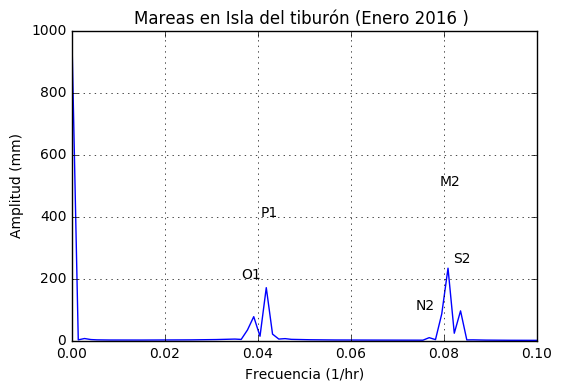

In [9]:
>>> from scipy.fftpack import fft
>>> # Number of sample points
>>> N = 744
>>> # sample spacing
>>> T = 1
>>> x = df['date']
>>> y = df['altura(mm)']
>>> yf = fft(y)
>>> xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
>>> import matplotlib.pyplot as plt
>>> plt.plot(xf, 1/N * np.abs(yf[0:N/2]))
plt.xlim(0,.1)
plt.ylim(0,1000)
>>> plt.grid()
plt.title(u'Mareas en Isla del tiburón (Enero 2016 ) ')  # Colocamos el título del gráfico
plt.xlabel('Frecuencia (1/hr)')  # Colocamos la etiqueta en el eje x
plt.ylabel('Amplitud (mm)')  # Colocamos la etiqueta en el eje y

plt.text(.0405,400,"P1")
plt.text(.0365,200,"O1")
plt.text(.079,500,"M2")
plt.text(.082,250,"S2")
plt.text(.074,100,"N2")
>>> plt.show()


/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


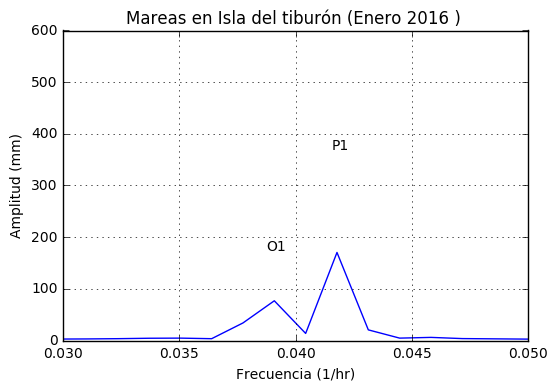

In [10]:
>>> from scipy.fftpack import fft
>>> # Number of sample points
>>> N = 744
>>> # sample spacing
>>> T = 1
>>> x = df['date']
>>> y = df['altura(mm)']
>>> yf = fft(y)
>>> xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
>>> import matplotlib.pyplot as plt
>>> plt.plot(xf, 1/N * np.abs(yf[0:N/2]))
plt.xlim(0.03,.05)
plt.ylim(0,600)
>>> plt.grid()
plt.title(u'Mareas en Isla del tiburón (Enero 2016 ) ')  # Colocamos el título del gráfico
plt.xlabel('Frecuencia (1/hr)')  # Colocamos la etiqueta en el eje x
plt.ylabel('Amplitud (mm)')  # Colocamos la etiqueta en el eje y

plt.text(.03873,175,"O1")
plt.text(.04155,370,"P1")
>>> plt.show()

/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


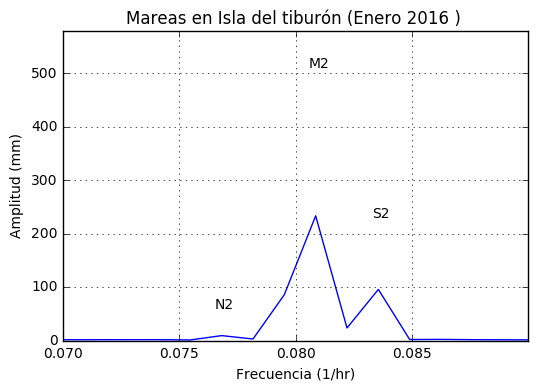

In [11]:
>>> from scipy.fftpack import fft
>>> # Number of sample points
>>> N = 744
>>> # sample spacing
>>> T = 1
>>> x = df['date']
>>> y = df['altura(mm)']
>>> yf = fft(y)
>>> xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
>>> import matplotlib.pyplot as plt
>>> plt.plot(xf, 1/N * np.abs(yf[0:N/2]))
plt.xlim(0.07,.09)
plt.ylim(0,580)
>>> plt.grid()
plt.title(u'Mareas en Isla del tiburón (Enero 2016 ) ')  # Colocamos el título del gráfico
plt.xlabel('Frecuencia (1/hr)')  # Colocamos la etiqueta en el eje x
plt.ylabel('Amplitud (mm)')  # Colocamos la etiqueta en el eje y

plt.text(.080576,510,"M2")
plt.text(.0833,230,"S2")
plt.text(.0765,60,"N2")

>>> plt.show()


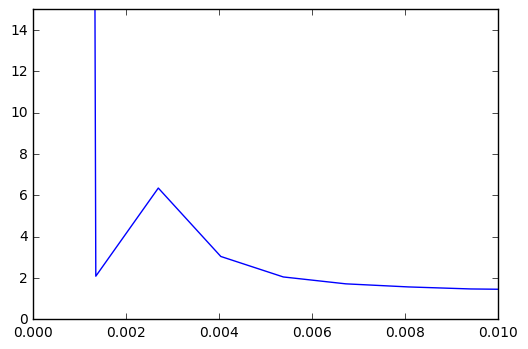

In [14]:
from scipy.fftpack import fft, fftfreq, fftshift
# number of signal points
N = 744
# sample spacing
T = 1
x = df['date']
y = df['altura(mm)']
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 1/N * np.abs(yplot))
plt.xlim(.0,.01)
plt.ylim(0,15)

plt.show()

In [ ]:
A=yf/N

In [ ]:
B=np.absolute(A)
B
print(np.where(B[:,]>6))
B[B[:,]>6]

In [15]:
print( '0')
print('Amplitud=',np.absolute(yf[0,]/N))
print('frecuencia=', xf[int(N/2 +0),])
print('periodo=', 1/xf[int(N/2 +0),])
print()
print( '2')
print('Amplitud=',np.absolute(yf[2,]/N))
print('frecuencia=', xf[int(N/2 +2),])
print('periodo=', 1/xf[int(N/2 +2),])
print()
print( '28')
print('Amplitud=',np.absolute(yf[28,]/N))
print('frecuencia=', xf[int(N/2 +28),])
print('periodo=', 1/xf[int(N/2 +28),])
print()
print( '29-o1')
print('Amplitud=',np.absolute(yf[29,]/N))
print('frecuencia=', xf[int(N/2 +29),])
print('periodo=', 1/xf[int(N/2 +29),])
print()
print( '30-M1')
print('Amplitud=',np.absolute(yf[30,]/N))
print('frecuencia=', xf[int(N/2 +30),])
print('periodo=', 1/xf[int(N/2 +30),])
print()
print( '31-s1')
print('Amplitud=',np.absolute(yf[31,]/N))
print('frecuencia=', xf[int(N/2 +31),])
print('periodo=', 1/xf[int(N/2 +31),])
print()
print( '32')
print('Amplitud=',np.absolute(yf[32,]/N))
print('frecuencia=', xf[int(N/2 +32),])
print('periodo=', 1/xf[int(N/2 +32),])
print()
print( '34')
print('Amplitud=',np.absolute(yf[34,]/N))
print('frecuencia=', xf[int(N/2 +34),])
print('periodo=', 1/xf[int(N/2 +34),])
print()
print( '57-N2')
print('Amplitud=',np.absolute(yf[57,]/N))
print('frecuencia=', xf[int(N/2 +57),])
print('periodo=', 1/xf[int(N/2 +57),])
print()
print( '59-\nu 2')
print('Amplitud=',np.absolute(yf[59,]/N))
print('frecuencia=', xf[int(N/2 +59),])
print('periodo=', 1/xf[int(N/2 +59),])
print()
print( '60-M2')
print('Amplitud=',np.absolute(yf[60,]/N))
print('frecuencia=', xf[int(N/2 +60),])
print('periodo=', 1/xf[int(N/2 +60),])
print()
print( '61-L2')
print('Amplitud=',np.absolute(yf[61,]/N))
print('frecuencia=', xf[int(N/2 +61),])
print('periodo=', 1/xf[int(N/2 +61),])
print()
print( '62-S2')
print('Amplitud=',np.absolute(yf[62,]/N))
print('frecuencia=', xf[int(N/2 +62),])
print('periodo=', 1/xf[int(N/2 +62),])
print()


0
Amplitud= 966.584677419
frecuencia= 0.0
periodo= inf

2
Amplitud= 6.35768010379
frecuencia= 0.00268817204301
periodo= 372.0

28
Amplitud= 33.9826035066
frecuencia= 0.0376344086022
periodo= 26.5714285714

29-o1
Amplitud= 76.8711583064
frecuencia= 0.0389784946237
periodo= 25.6551724138

30-M1
Amplitud= 13.6961505638
frecuencia= 0.0403225806452
periodo= 24.8

31-s1
Amplitud= 170.417791592
frecuencia= 0.0416666666667
periodo= 24.0

32
Amplitud= 20.5735933152
frecuencia= 0.0430107526882
periodo= 23.25

34
Amplitud= 6.01419075631
frecuencia= 0.0456989247312
periodo= 21.8823529412

57-N2
Amplitud= 9.15123669533
frecuencia= 0.0766129032258
periodo= 13.0526315789

59-
u 2
Amplitud= 85.7750232196
frecuencia= 0.0793010752688
periodo= 12.6101694915

60-M2
Amplitud= 233.28303954
frecuencia= 0.0806451612903
periodo= 12.4

61-L2
Amplitud= 23.4526493975
frecuencia= 0.0819892473118
periodo= 12.1967213115

62-S2
Amplitud= 95.5743925587
frecuencia= 0.0833333333333
periodo= 12.0

